<center><font size="4"><b>Statistical Tests Significance testing; AB Testing; Simpson paradox </b></font></center>

***

## Task 1: testing

A research study was conducted to examine the differences between older and younger adults on perceived life satisfaction. A pilot study was conducted to examine this hypothesis. Ten older adults (over the age of 70) and ten younger adults (between 20 and 30) were give a life satisfaction test (known to have high reliability and validity). Scores on the measure range from 0 to 60 with high scores indicative of high life satisfaction; low scores indicative of low life satisfaction. The data are presented below. Compute the appropriate t-test.

1. What would be the null hypothesis in this study?
2. What would be the alternate hypothesis?
3. What probability level did you choose and why?
4. What is your tcrit?
5. Is there a significant difference between the two groups?
6. Interpret your answer.
7. If you have made an error, would it be a Type I or a Type II error? 

In [2]:
older_adults = [45, 38, 52, 48, 25, 39, 51, 46, 55, 46]
younger_adults = [34, 22, 15, 27, 37, 41, 24, 19, 26, 36]

In [3]:
from scipy import stats
import numpy as np
import pandas as pd

In [4]:
mu_1 = np.mean(older_adults)
mu_2 = np.mean(younger_adults)

sigma_1 = np.std(older_adults, ddof=1)
sigma_2 = np.std(younger_adults, ddof=1)

n = 10

In [5]:
mu_1 = 1.3
mu_2 = 1.6
sigma_1 = 0.25
sigma_2 = 0.09

n_1 = 22
n_2 = 24

import numpy as np

t = (mu_2 - mu_1) / (sigma_1/n_1 + sigma_2/n_2)
t 

19.84962406015038

In [6]:
t = (-mu_2 + mu_1) / (np.sqrt(sigma_2**2/n + sigma_1**2/n))
t

-3.570416691943344

In [7]:
t_crit = stats.t.ppf(1-0.05/2, 18)
t_crit

2.10092204024096

In [8]:
t < t_crit

True

In [9]:
p = 1 - stats.t.cdf(t,df=19)
p

0.998979362829552

In [10]:
alpha = 0.05
p < alpha

False

## Task 2: testing

A researcher hypothesizes that electrical stimulation of the lateral habenula will result in a decrease in food intake (in this case, chocolate chips) in rats. Rats undergo stereotaxic surgery and an electrode is implanted in the right lateral habenula. Following a ten day recovery period, rats (kept at 80 percent body weight) are tested for the number of chocolate chips consumed during a 10 minute period of time both with and without electrical stimulation. The testing conditions are counter balanced. Compute the appropriate t-test for the data provided below.

1. What would be the null hypothesis in this study?
2. What would be the alternate hypothesis?
3. What probability level did you choose and why?
4. What were your degrees of freedom?
5. Is there a significant difference between the two testing conditions?
6. Interpret your answer.
7. If you have made an error, would it be a Type I or a Type II error?

In [11]:
stimulation	= [12, 7, 3, 11, 8, 5, 14, 7, 9, 10]
no_stimulation = [8, 7, 4, 14, 6, 7, 12, 5, 5, 8]
alpha = 0.05
n = 10

mu_1 = np.mean(no_stimulation)
mu_2 = np.mean(stimulation)

sigma_1 = np.std(no_stimulation, ddof=1)
sigma_2 = np.std(stimulation, ddof=1)

# t_crit = stats.t.ppf

In [12]:
t = (mu_2 - mu_1) / (np.sqrt(sigma_2**2/n + sigma_1**2/n))

print(f't = {t: .2f}, t_critical = {t_crit: .2f}')
if t <= t_crit:
    print('t <= t critical. Accept H_0.')
else:
    print('t > t critical. Reject H_0.')

t =  0.69, t_critical =  2.10
t <= t critical. Accept H_0.


In [13]:
p = 1 - stats.t.cdf(t,df=19)
p

0.24913574227679747

## Task 3: testing

Researchers want to examine the effect of perceived control on health complaints of geriatric patients in a long-term care facility. Thirty patients are randomly selected to participate in the study. Half are given a plant to care for and half are given a plant but the care is conducted by the staff. Number of health complaints are recorded for each patient over the following seven days. Compute the appropriate t-test for the data provided below.

1. What would be the null hypothesis in this study?
2. What would be the alternate hypothesis?
3. What probability level did you choose and why?
4. What were your degrees of freedom?
5. Is there a significant difference between the two testing conditions?
6. Interpret your answer.
7. If you have made an error, would it be a Type I or a Type II error?

In [15]:
control_over_plant = [23, 12, 6, 15, 18, 5, 21, 18, 34, 10, 23, 14, 19, 23, 8]
no_control_over_plant = [35, 21, 26, 24, 17, 23, 37, 22, 16, 38, 23, 41, 27, 24, 32]

In [16]:
import numpy as np
from scipy import stats as st

In [17]:
h0 = 'there is affect'
h1 = 'there is no affect'

n = 15
alpha = 0.05
ddf = 15 * 2 -1

mu_1 = np.mean(control_over_plant)
mu_2 = np.mean(no_control_over_plant)

sigma_0 = np.std(control_over_plant, ddof=1)
sigma_1 = np.std(no_control_over_plant, ddof=1)

t_crit = st.t.ppf((1-alpha)/2, ddf)

t = abs((mu_1 - mu_2)) / (np.sqrt(sigma_0**2/n + sigma_1**2/n))

t < t_crit

False

## Task 4: transactions dataset investigation


In this task you should perform investigation of the transactions dataset of some e-commerce service that provides different kind of **service-packages** and performs on both **desktop** and **mobile**. Each record corresponds to the website visit session by certain user and could be finished by buying the product of not (see `is_paid_order` column).

In [18]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/devrepublik/data-science-course/master/data/a-b-testing/2.3.7.%20conversion_dataset.csv", index_col=0, parse_dates=["order_date"])
df.head(10)

,order_date,package_level,device,is_paid_order
0,2012-01-01 00:10:32,standard,desktop,1
1,2012-01-01 01:02:35,standard,desktop,0
2,2012-01-01 01:05:35,standard,desktop,1
3,2012-01-01 01:20:52,standard,desktop,1
4,2012-01-01 01:38:27,standard,desktop,0
5,2012-01-01 02:04:11,standard,desktop,0
6,2012-01-01 03:08:33,standard,desktop,1
7,2012-01-01 03:43:02,premium,desktop,1
8,2012-01-01 05:35:16,standard,mobile,1
9,2012-01-01 06:00:20,standard,desktop,0


In [19]:
df.groupby('package_level')['is_paid_order'].count()


package_level
platinum    10580
premium     23742
standard    65678
Name: is_paid_order, dtype: int64

### A. Average conversion rate, SE and CI
Calculate the average conversion rate (order payment rate), its standard error (SE) and confidence interval (CI) with significance 95%. 

**Hint:** You can treat the column `is_paid_order` as the observation variable that follows **Bernoulli distribution**. Then convertion rate is calculated as a mean value of the observations sample.

In [20]:
# YOUR CODE GOES HERE

alpha = 0.05
convertion_rate = len(df[df['is_paid_order'] == 1]) / len(df)
convertion_rate

0.69303

In [21]:
se =  np.sqrt(convertion_rate * (1-convertion_rate)) / np.sqrt(len(df))
se

0.0014585589432724341

In [22]:
t_score = st.t.ppf(1-alpha/2, len(df) - 1)
t_score

1.9599877077718446

In [23]:
lower = convertion_rate - t_score * se
upper = convertion_rate + t_score * se

In [24]:
lower, upper

(0.6901712424001254, 0.6958887575998747)

### B. comparing conversion by segments

Compare conversion rate by different **devices** and **package_level**. Is the difference statistically significant?

In [26]:
def ttest_ind(data, package, device):
    """Returns the p_value of the t-test"""
    
    data = df[(df['package_level'] == package) & ((df['device'] == device))]
    
    alpha = 0.05
    
    convertion_rate = len(data[data['is_paid_order'] == 1]) / len(data)
    se =  np.sqrt(convertion_rate * (1-convertion_rate)) / np.sqrt(len(data))
    
    t_score = st.t.ppf(1-alpha/2, len(data) - 1)

    lower = convertion_rate - t_score * se
    upper = convertion_rate + t_score * se
    
    t = (mu_2 - mu_1) / (np.sqrt(sigma_2**2/n + sigma_1**2/n))

    
    return lower, upper, t_score

In [27]:
ttest_ind(df, 'premium', 'desktop') 

(0.7291396031343815, 0.7409674412259233, 1.9600748859601018)

In [28]:
ttest_ind(df, 'standard', 'desktop')

(0.6902208118003856, 0.697815672679569, 1.9600059198271116)

In [29]:
ttest_ind(df, 'premium', 'mobile') 

(0.6062187569609947, 0.6453776670492224, 1.9609748336798793)

In [30]:
ttest_ind(df, 'standard', 'mobile') 

(0.5474518212624, 0.5678567664819445, 1.9602245645790968)

In [31]:
def ttest_ind_2(data, arr1, arr2):
    
    mean_1 = df['is_paid_order'][df['device'] == arr1].mean()
    mean_2 = df['is_paid_order'][df['device'] == arr2].mean()
    
    sigma_0 = np.std(df['is_paid_order'][df['device'] == arr1], ddof=1)
    sigma_1 = np.std(df['is_paid_order'][df['device'] == arr2], ddof=1)
    
    n1 = len(df['is_paid_order'][df['device'] == arr1])
    n2 = len(df['is_paid_order'][df['device'] == arr2])
    
    t_crit = st.t.ppf(1-0.05/2, n1+n2-1)
    
    t_calc = abs((mean_1 - mean_2)) / (np.sqrt(sigma_0**2/n1 + sigma_1**2/n2))
    
    print(t_crit, t_calc)

    return t_calc <= t_crit

ttest_ind_2(df, 'desktop', 'mobile')

1.9599877077718446 29.321913142542687


False

### C. conversion timeseries plot

Sample data by different time periods (1 hour, day, week, month) and plot the conversion rate timeseries (dependency on time) and its 95% significance confidence interval (CI). 

What time period of sampling would you use for conversion timeseries presentation? Why?

**Hint:** in order to sample data you can use `pandas` `resample` function for grouping and then process the samples using `apply`.


**Hint 2:** in order to visualize CI you can use `matplotlib` `fill_between` function.

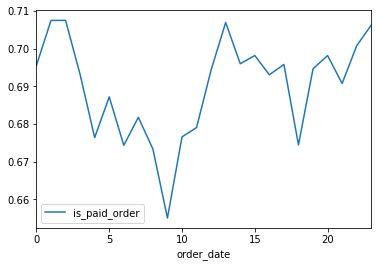

In [34]:
import matplotlib.pyplot as plt

df.groupby(df['order_date'].dt.hour)[['is_paid_order']].mean().plot()

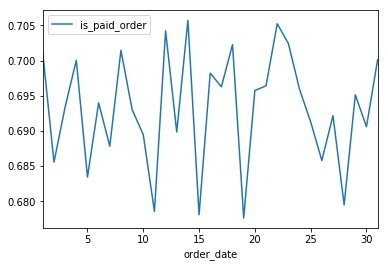

In [35]:
df.groupby(df['order_date'].dt.day)[['is_paid_order']].mean().plot()

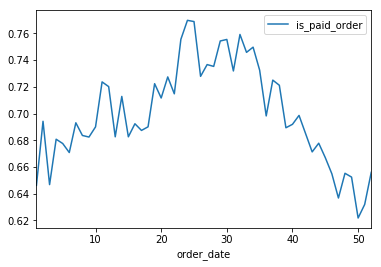

In [36]:
df.groupby(df['order_date'].dt.week)[['is_paid_order']].mean().plot()

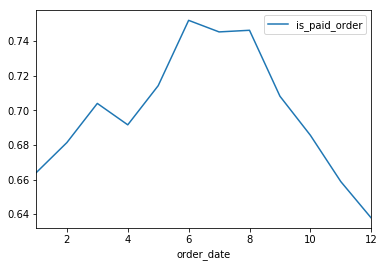

In [37]:
df.groupby(df['order_date'].dt.month)[['is_paid_order']].mean().plot()

In [38]:
import scipy
import matplotlib.pyplot as plt

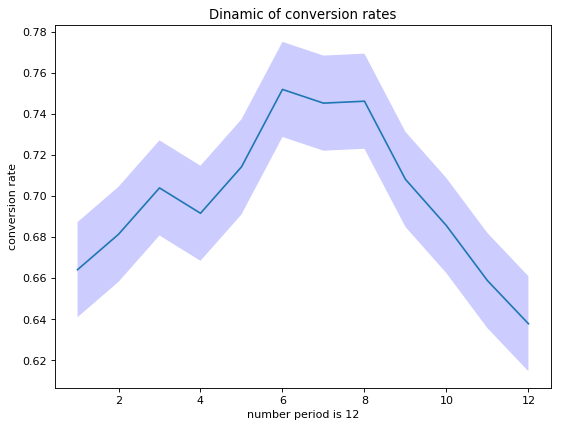

In [39]:
alpha = 0.05
number_sample = 12

mean_cr = df.groupby(df['order_date'].dt.month)['is_paid_order'].sum() / \
        df.groupby(df['order_date'].dt.month)['is_paid_order'].count()

se_cr = np.std(mean_cr, ddof=1) / np.sqrt(number_sample) 

t_score = st.t.ppf(1-alpha/2, number_sample -1)

lower = mean_cr - t_score * se_cr
upper = mean_cr + t_score * se_cr

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='r')


plt.xlabel('number period is {}'.format(number_sample))
plt.ylabel('conversion rate')
plt.title('Dinamic of conversion rates')

plt.plot(mean_cr)
plt.fill_between(range(1,13), lower, upper, edgecolor='none', facecolor='b', alpha=0.2, interpolate=True)